In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

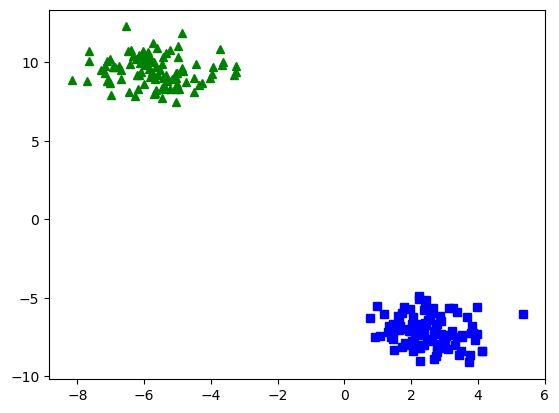

In [ ]:
# generate 200 samples with 2 centers and 2 features

x, y = datasets.make_blobs(n_samples=200, centers=2, n_features=2,  center_box=(0, 10))
plt.plot(x[y == 0, 0], x[y == 0, 1], 'g^')
plt.plot(x[y == 1, 0], x[y == 1, 1], 'bs')
plt.show()

y[y==0] = -1

In [ ]:
np.unique(y, return_counts=True)

(array([-1,  1]), array([100, 100], dtype=int64))

In [ ]:
w = np.random.normal(size=2)
w0 = np.random.normal(size=1)
print("w: ", w)
print("w0: ", w0)


w:  [1.21754348 0.86927931]
w0:  [-0.2277925]


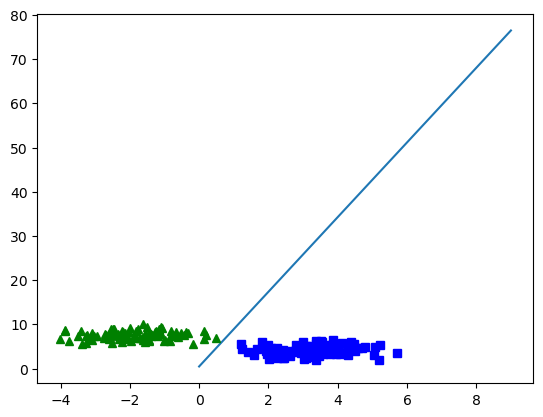

In [ ]:
def show(w, w0, x, y):
    slope = -w[0] / w[1] # w[0] -> w1, and w[1] -> w2 ; w1x1 + w2y + w0 = 0
    intercept = -w0 / w[1]
    hplane_x = np.arange(10)
    hplane_y = slope * hplane_x + intercept # y = mx + c
    plt.plot(hplane_x, hplane_y)
    plt.plot(x[:, 0][y == -1], x[:, 1][y == -1], 'bs')
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'g^')
    plt.show()

show(w, w0, x, y)


In [ ]:
np.sign(-5)

-1

In [ ]:
# perceptron algorithm

def algorithm(x, y, w, w0):
    for iteration in range(5000):
        miss_cls = 0
        for point in range(len(x)):
            hs = np.sign(np.dot(w, x[point]) + w0) # ax1 + bx2 + c; if it's less than 0, then it's -1, else 1
            if hs != np.sign(y[point]):
                miss_cls += 1
                w += x[point] * np.sign(y[point])
                w0 += np.sign(y[point])

        if miss_cls == 0:
            print("No mis-classification at iteration: ", iteration)
            show(w, w0, x, y)
            print("N_iter: ", iteration, ' |100% correct classification')
            break


    if iteration% 500 == 0:
        print("N_iter: ", iteration, ' |Miss-classification: ', miss_cls, "| Accuracy: ", 1 - miss_cls/len(x))
        show(w, w0, x, y)

    return w, w0


w:  [-0.06932191  1.57270714]
w0:  [0.14843214]
No mis-classification at iteration:  1


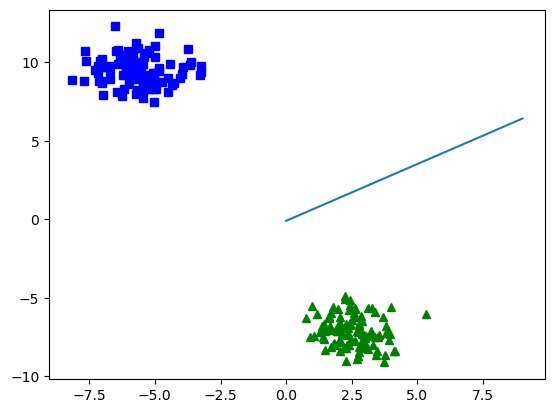

N_iter:  1  |100% correct classification


In [ ]:
w = np.random.normal(size=2)
w0 = np.random.normal(size=1)
print("w: ", w)
print("w0: ", w0)


w, w0 = algorithm(x, y, w, w0)

